In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
submit = pd.read_csv('gender_submission.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### 合併train、test資料

In [7]:
#合併train、test
data=train.append(test)

### 合併資料後，處理重複值 .reset_index(inplace=True,drop=True)

In [8]:
#append合併之後，造成index重複問題，因此要將index重新設定
data.reset_index(inplace=True,drop=True)

# 【資料分析】

## ---------------------------------------- 間斷資料分析 ----------------------------------------

## >>> sns.countplot(data['間斷資料 '],hue=data['間斷資料 '])

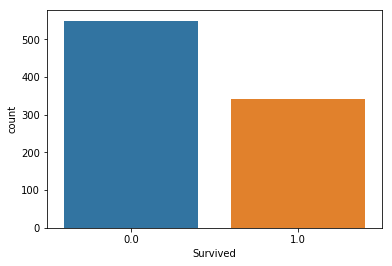

In [9]:
# 【生存率分析】
# 發現 死亡的比例:6成、生存的比例:4成
sns.countplot(data['Survived'])  

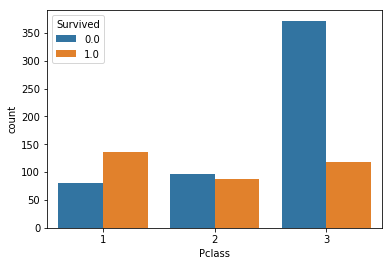

In [10]:
# 【艙等】 跟生存率的關係
# 發現 生存率最高排序=>1艙等、2艙等、3艙等
sns.countplot(data['Pclass'],hue=data['Survived'])

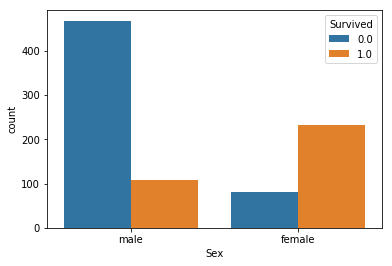

In [11]:
# 【性別】跟生存率的關係，發現女生生存率是男生的好幾倍。
sns.countplot(data['Sex'],hue=data['Survived'])

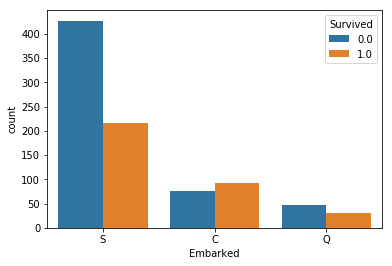

In [12]:
# 【出發港口】跟生存率  s港出發的都比較容易死亡
sns.countplot(data['Embarked'],hue=data['Survived'])

## ---------------------------------------- 連續資料分析 --------------------------------------------

### >>> 圖表 : 資料名=sns.FacetGrid(data, col='間斷資料欄位')
### >>> 圖表 : 資料名.map(sns.distplot, '連續資料欄位', kde=False)

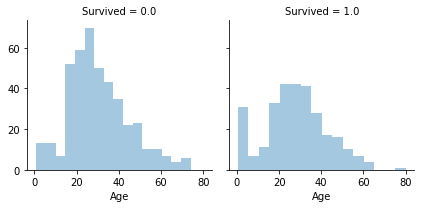

In [13]:
# 【年齡】跟生存率    年齡小的存活比例高
# sns.FacetGrid g.map sns.distplot  
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Age', kde=False)

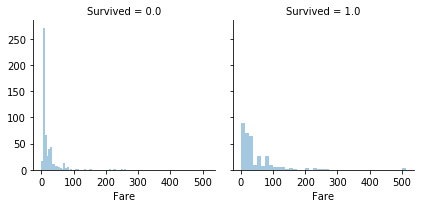

In [14]:
# 【票價】、生存率  票價低的乘客死亡率高
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Fare', kde=False)

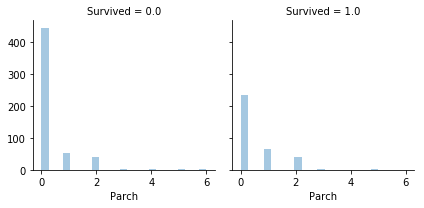

In [15]:
# 【父母＋小孩的數量】、生存率  
# 沒有跟父母小孩一起來的 生存率低
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Parch', kde=False)

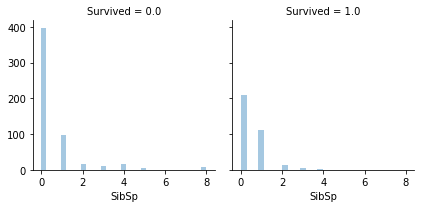

In [16]:
# 【兄弟姊妹＋丈夫妻子的數量】、生存率  
# 沒有帶兄弟姊妹＋丈夫妻子一起來的 生存率低
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'SibSp', kde=False)

In [17]:
# 把家人加在同一欄位
data['Family_Size']=data['Parch']+data['SibSp']

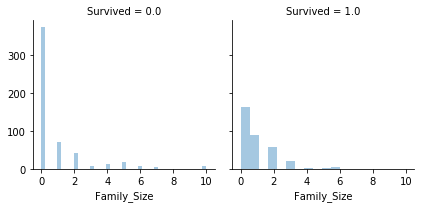

In [18]:
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Family_Size', kde=False)

# 【特徵分析】

## 1. -------------------------------------- 缺失值處理 ------------------------------------------------

### >>> 圖表 : data['欄位甲'].   fillna(  data['欄位甲'].     mean(), inplace=True)
### >>> 圖表 : data['欄位乙'].   fillna(        '替代值'                      , inplace=True)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Family_Size    1309 non-null int64
dtypes: float64(3), int64(5), object(5)
memory usage: 133.0+ KB


In [20]:
# Survived 不能先補缺，確保後續資料分析正確
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Embarked'].fillna('S', inplace=True)
data['Fare'].fillna(data['Fare'].mean(), inplace=True)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 13 columns):
Age            1309 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Family_Size    1309 non-null int64
dtypes: float64(3), int64(5), object(5)
memory usage: 133.0+ KB


## 2. ----------------------------------------- 取出人稱謂 -----------------------------------------

### >>> data['Name'].str.split(', ',expand=True)[0 or 1]

In [22]:
# 分割 name ,
# expand=True
# [1]          分割兩群之後，保留(前:0 或 後:1)
data['Title1']=data['Name'].str.split(', ',expand=True)[1]

In [23]:
data['Title1'].head(3)

0                               Mr. Owen Harris
1    Mrs. John Bradley (Florence Briggs Thayer)
2                                   Miss. Laina
Name: Title1, dtype: object

In [24]:
# 分割 name .
data['Title1']=data['Title1'].str.split('. ',expand=True)[0]

In [25]:
data['Title1'].head(3)

0      Mr
1     Mrs
2    Miss
Name: Title1, dtype: object

In [26]:
#建立稱謂清單
data['Title1'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'th', 'Jonkheer',
       'Dona'], dtype=object)

## -------------------- 分析人稱謂，對 性別、生存率、年齡 之關係 --------------------

### >>> 圖表  :   pd.crosstab  (data['Title1'], data['Sex'])  .T.style  .background_gradient(cmap='summer_r')

In [27]:
pd.crosstab(data['Title1'],data['Sex']).T.style.background_gradient(cmap='summer_r')

Title1,Capt,Col,Don,Dona,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,th
Sex,,,,,,,,,,,,,,,,,,
female,0,0,0,1,1,0,1,0,0,260,2,1,0,197,2,0,0,1
male,1,4,1,0,7,1,0,2,61,0,0,0,757,0,0,8,1,0


In [28]:
pd.crosstab(data['Title1'],data['Survived']).T.style.background_gradient(cmap='summer_r')

Title1,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,th
Survived,,,,,,,,,,,,,,,,,
0.0,1,1,1,4,1,0,1,17,55,0,0,436,26,0,6,0,0
1.0,0,1,0,3,0,1,1,23,127,2,1,81,99,1,0,1,1


In [29]:
# groupby稱謂，計算平均年齡
data.groupby(['Title1'])['Age'].mean()

Title1
Capt        70.000000
Col         54.000000
Don         40.000000
Dona        39.000000
Dr          41.860142
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       8.682444
Miss        23.333257
Mlle        24.000000
Mme         24.000000
Mr          31.700899
Mrs         36.019242
Ms          28.940569
Rev         41.250000
Sir         49.000000
th          33.000000
Name: Age, dtype: float64

In [30]:
data.groupby(['Title1','Pclass'])['Age'].mean()

Title1    Pclass
Capt      1         70.000000
Col       1         54.000000
Don       1         40.000000
Dona      1         39.000000
Dr        1         42.980190
          2         38.500000
Jonkheer  1         38.000000
Lady      1         48.000000
Major     1         48.500000
Master    1          6.984000
          2          2.757273
          3         10.319536
Miss      1         30.331352
          2         21.083646
          3         21.283890
Mlle      1         24.000000
Mme       1         24.000000
Mr        1         39.486105
          2         32.133032
          3         28.793158
Mrs       1         41.478070
          2         33.452384
          3         31.724588
Ms        2         28.000000
          3         29.881138
Rev       2         41.250000
Sir       1         49.000000
th        1         33.000000
Name: Age, dtype: float64

## ---------------------------------- 覆寫少數稱謂成 Miss Mrs Mr----------------------------------

#### 某些稱謂的乘客佔少數，多了某些稱謂欄，對於機器學習模型，不是好事。故將少數稱謂覆寫。

### >>> 覆寫 :  data['欄位']  =  data['欄位']  .replace (  [name...] ,  [name1...] )
### >>> groupby :  data.groupby(['欄位甲','欄位乙'])['要平均的欄位'].mean()

In [31]:
data['Title2']=data['Title1'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','th','Don','Rev','Sir','Col','Capt','Jonkheer','Dona'],
                                     ['Miss','Mrs','Miss','Mr','Mr','Mrs','Mrs','Mr','Mr','Mr','Mr','Mr','Mr','Mrs'])

In [32]:
data['Title2'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master'], dtype=object)

In [33]:
pd.crosstab(data['Title2'],data['Sex']).T.style.background_gradient(cmap='summer_r')

Title2,Master,Miss,Mr,Mrs
Sex,,,,
female,0,264,1,201
male,61,0,782,0


In [34]:
pd.crosstab(data['Title2'],data['Survived']).T.style.background_gradient(cmap='summer_r')

Title2,Master,Miss,Mr,Mrs
Survived,,,,
0.0,17,55,451,26
1.0,23,130,87,102


In [35]:
data.groupby('Title2')['Age'].mean()

Title2
Master     8.682444
Miss      23.380788
Mr        32.148737
Mrs       36.018859
Name: Age, dtype: float64

In [36]:
data.groupby(['Title2','Pclass'])['Age'].mean()

Title2  Pclass
Master  1          6.984000
        2          2.757273
        3         10.319536
Miss    1         30.127115
        2         21.219260
        3         21.340825
Mr      1         40.263839
        2         32.668467
        3         28.793158
Mrs     1         41.207548
        2         33.452384
        3         31.724588
Name: Age, dtype: float64

In [37]:
list(data.groupby(['Title2','Pclass'])['Age'].mean().iteritems())[:3]

[(('Master', 1), 6.984),
 (('Master', 2), 2.7572727272727273),
 (('Master', 3), 10.31953558529849)]

## 3. ---------------------------------- 取出票號 前面英文(房間) ----------------------------------

### >>> .apply(lambda x : x.replace(".","").replace("/","").strip().split(' ')[0] if not x.isdigit() else 'X')

In [38]:
data['Ticket'].head()

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [39]:
data['Ticket_info'] = data['Ticket'].apply(lambda x : x.replace(".","").replace("/","").strip().split(' ')[0] if not x.isdigit() else 'X')

In [40]:
data['Ticket_info'].head()

0        A5
1        PC
2    STONO2
3         X
4         X
Name: Ticket_info, dtype: object

In [41]:
data['Ticket_info'].unique()

array(['A5', 'PC', 'STONO2', 'X', 'PP', 'CA', 'SCParis', 'SCA4', 'A4',
       'SP', 'SOC', 'WC', 'SOTONOQ', 'WEP', 'STONO', 'C', 'SCPARIS',
       'SOP', 'Fa', 'LINE', 'FCC', 'SWPP', 'SCOW', 'PPP', 'SC', 'SCAH',
       'AS', 'SOPP', 'FC', 'SOTONO2', 'CASOTON', 'SCA3', 'STONOQ', 'AQ4',
       'A', 'LP', 'AQ3'], dtype=object)

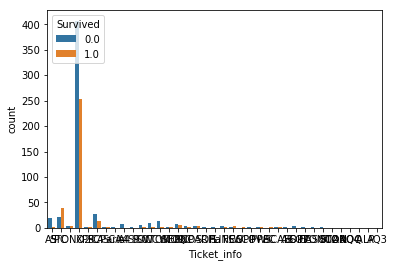

In [42]:
# Ticket_info(房間)為間斷資料   'X'房型最多人
sns.countplot(data['Ticket_info'], hue=data['Survived'])

## 4.----------------------------------------- 客艙、生存率 -----------------------------------------

### 選出客艙第一個字母 ，缺值則改為'NoCabin'。  
### >>> .apply(lambda x : str(x)[0] if not pd.isnull(x) else 'NoCabin')

In [43]:
data['Cabin'].head(10)

0     NaN
1     C85
2     NaN
3    C123
4     NaN
5     NaN
6     E46
7     NaN
8     NaN
9     NaN
Name: Cabin, dtype: object

In [44]:
# 選出客艙第一個字母 ，缺值則改為'NoCabin'
data["Cabin"] = data['Cabin'].apply(lambda x : str(x)[0] if not pd.isnull(x) else 'NoCabin')

In [45]:
data['Cabin'].head(10)

0    NoCabin
1          C
2    NoCabin
3          C
4    NoCabin
5    NoCabin
6          E
7    NoCabin
8    NoCabin
9    NoCabin
Name: Cabin, dtype: object

In [46]:
# 建立客艙清單
data["Cabin"].unique()

array(['NoCabin', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

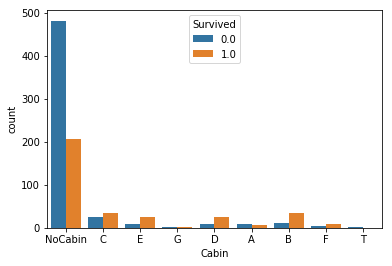

In [47]:
# Cabin(客艙)為間斷資料
sns.countplot(data['Cabin'], hue=data['Survived'])

# 【將類別資料轉為整數】

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 16 columns):
Age            1309 non-null float64
Cabin          1309 non-null object
Embarked       1309 non-null object
Fare           1309 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Family_Size    1309 non-null int64
Title1         1309 non-null object
Title2         1309 non-null object
Ticket_info    1309 non-null object
dtypes: float64(3), int64(5), object(8)
memory usage: 163.7+ KB


In [49]:
data.head(5)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size,Title1,Title2,Ticket_info
0,22.0,NoCabin,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,1,Mr,Mr,A5
1,38.0,C,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,1,Mrs,Mrs,PC
2,26.0,NoCabin,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,0,Miss,Miss,STONO2
3,35.0,C,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,1,Mrs,Mrs,X
4,35.0,NoCabin,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,0,Mr,Mr,X


In [50]:
data['Cabin'] = data['Cabin'].astype('category').cat.codes
data['Embarked'] = data['Embarked'].astype('category').cat.codes
data['Sex'] = data['Sex'].astype('category').cat.codes
data['Pclass'] = data['Pclass'].astype('category').cat.codes
data['Title1'] = data['Title1'].astype('category').cat.codes
data['Title2'] = data['Title2'].astype('category').cat.codes
data['Ticket_info'] = data['Ticket_info'].astype('category').cat.codes

In [51]:
data.head(5)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size,Title1,Title2,Ticket_info
0,22.0,7,2,7.2500,"Braund, Mr. Owen Harris",0,1,2,1,1,0.0,A/5 21171,1,12,2,2
1,38.0,2,0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,0,0,1,1.0,PC 17599,1,13,3,14
2,26.0,7,2,7.9250,"Heikkinen, Miss. Laina",0,3,2,0,0,1.0,STON/O2. 3101282,0,9,1,31
3,35.0,2,2,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,0,0,1,1.0,113803,1,13,3,36
4,35.0,7,2,8.0500,"Allen, Mr. William Henry",0,5,2,1,0,0.0,373450,0,12,2,36


# 【拆出訓練集、測試集】

### 單一Survived欄位為 pandas.core.series.Series ，需將Y轉成整數 Y=Y.astype(int)

#  〔訓練集］ 

In [52]:
# 將data拆出survived有數值的部分(原始test列數)
data[:895]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size,Title1,Title2,Ticket_info
0,22.000000,7,2,7.2500,"Braund, Mr. Owen Harris",0,1,2,1,1,0.0,A/5 21171,1,12,2,2
1,38.000000,2,0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,0,0,1,1.0,PC 17599,1,13,3,14
2,26.000000,7,2,7.9250,"Heikkinen, Miss. Laina",0,3,2,0,0,1.0,STON/O2. 3101282,0,9,1,31
3,35.000000,2,2,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,0,0,1,1.0,113803,1,13,3,36
4,35.000000,7,2,8.0500,"Allen, Mr. William Henry",0,5,2,1,0,0.0,373450,0,12,2,36
5,29.881138,7,1,8.4583,"Moran, Mr. James",0,6,2,1,0,0.0,330877,0,12,2,36
6,54.000000,4,2,51.8625,"McCarthy, Mr. Timothy J",0,7,0,1,0,0.0,17463,0,12,2,36
7,2.000000,7,2,21.0750,"Palsson, Master. Gosta Leonard",1,8,2,1,3,0.0,349909,4,8,0,36
8,27.000000,7,2,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,2,0,0,1.0,347742,2,13,3,36
9,14.000000,7,0,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,1,0,1,1.0,237736,1,13,3,36


In [53]:
data1=data[:891]
data1

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size,Title1,Title2,Ticket_info
0,22.000000,7,2,7.2500,"Braund, Mr. Owen Harris",0,1,2,1,1,0.0,A/5 21171,1,12,2,2
1,38.000000,2,0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,0,0,1,1.0,PC 17599,1,13,3,14
2,26.000000,7,2,7.9250,"Heikkinen, Miss. Laina",0,3,2,0,0,1.0,STON/O2. 3101282,0,9,1,31
3,35.000000,2,2,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,0,0,1,1.0,113803,1,13,3,36
4,35.000000,7,2,8.0500,"Allen, Mr. William Henry",0,5,2,1,0,0.0,373450,0,12,2,36
5,29.881138,7,1,8.4583,"Moran, Mr. James",0,6,2,1,0,0.0,330877,0,12,2,36
6,54.000000,4,2,51.8625,"McCarthy, Mr. Timothy J",0,7,0,1,0,0.0,17463,0,12,2,36
7,2.000000,7,2,21.0750,"Palsson, Master. Gosta Leonard",1,8,2,1,3,0.0,349909,4,8,0,36
8,27.000000,7,2,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,2,0,0,1.0,347742,2,13,3,36
9,14.000000,7,0,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,1,0,1,1.0,237736,1,13,3,36


In [54]:
selected_features = ['Age','Cabin','Embarked','Fare','Parch','PassengerId','Pclass','Sex','SibSp','Family_Size','Title2','Ticket_info']

In [55]:
# ------------x_train-------------
x_train=data1[selected_features]

In [56]:
y_train=data1['Survived']

In [57]:
x_train=x_train.astype(int)
y_train=y_train.astype(int)

In [58]:
type(x_train)

pandas.core.frame.DataFrame

In [59]:
type(y_train)

pandas.core.series.Series

In [ ]:
x_train #有891列

In [ ]:
y_train #有891列

# ［測試集］

# test 欄位整理

In [ ]:
data[891:]

In [63]:
data2=data[891:]

In [64]:
test=data2

# test 選擇欄位

In [65]:
x_test=test[selected_features]

In [66]:
y_test=test['Survived']

In [67]:
x_test.head(3)

,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Family_Size,Title2,Ticket_info
891,34.5,7,1,7.8292,0,892,2,1,0,0,2,36
892,47.0,7,2,7.0000,0,893,2,0,1,1,3,36
893,62.0,7,1,9.6875,0,894,1,1,0,0,2,36


In [68]:
x_test=x_test.astype(int)

In [69]:
x_test.head(3)

,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Family_Size,Title2,Ticket_info
891,34,7,1,7,0,892,2,1,0,0,2,36
892,47,7,2,7,0,893,2,0,1,1,3,36
893,62,7,1,9,0,894,1,1,0,0,2,36


In [ ]:
x_test #有418列

In [71]:
type(test)

pandas.core.frame.DataFrame

# 【使用MPL做分類】

In [72]:
import keras

C:\Users\User\program\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [73]:
model = keras.models.Sequential()

## 模型建立

In [74]:
# 现在主流的做法，会多做一步batch normalization，尽可能保证每一层网络的输入具有相同的分布[1]。而最新的paper[2]，他们在加入bypass connection之后，发现改变batch normalization的位置会有更好的效果。大家有兴趣可以看下。

In [75]:
# input有12欄位
# activation 檢查神經元產生的 Y 。Y > 門檻,則為 1
# 若 多個神經被 activate，想找出 highest activation
# 多層感知器的 activation= "softmax" 分類器
model.add(keras.layers.Dense(40, input_dim=12, activation=('relu')))
model.add(keras.layers.Dense(30, activation=('relu')))
model.add(keras.layers.Dense(1,  activation=('sigmoid')))

## 透過 compile 對學習過程進行配置，接受三個參數

In [76]:
# 優化器   optimizier --> rmsprop、adagrad
# 損失函數   loss     --> 最小化目標函數 categorical——crossentropy、mse
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# 【訓練模型】

In [77]:
# model.fit(x_train, y_train, validation_split=0.1, epochs=30) # 訓練:測試 = 9:1   # 做30次
# 類似 K-Fold Cross Validation

In [300]:
model.fit(x_train, y_train, epochs=30)

Epoch 1/30
891/891 [==============================] - 0s 40us/step - loss: 0.0972 - acc: 0.9630
Epoch 2/30
891/891 [==============================] - 0s 31us/step - loss: 0.0921 - acc: 0.9618
Epoch 3/30
891/891 [==============================] - 0s 36us/step - loss: 0.0927 - acc: 0.9675
Epoch 4/30
891/891 [==============================] - 0s 36us/step - loss: 0.0884 - acc: 0.9675
Epoch 5/30
891/891 [==============================] - 0s 49us/step - loss: 0.1093 - acc: 0.9630
Epoch 6/30
891/891 [==============================] - 0s 36us/step - loss: 0.1294 - acc: 0.9517
Epoch 7/30
891/891 [==============================] - 0s 31us/step - loss: 0.1136 - acc: 0.9540
Epoch 8/30
891/891 [==============================] - 0s 49us/step - loss: 0.1054 - acc: 0.9607
Epoch 9/30
891/891 [==============================] - 0s 36us/step - loss: 0.1004 - acc: 0.9630
Epoch 10/30
891/891 [==============================] - 0s 36us/step - loss: 0.0825 - acc: 0.9731
Epoch 11/30
891/891 [==================

In [301]:
# 測試模型
acc = model.evaluate(x_test, y_test)

418/418 [==============================] - 0s 29us/step


# 【用訓練好的模型做預測】

In [302]:
survived_predict = model.predict_classes(x_test)

In [303]:
survived_predict

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
    

In [304]:
import numpy as np

In [ ]:
np.where(survived_predict > 0.5, 1, 0)

# 【結果輸出成規定的格式】

### survived_predict 需要降維
### 參考 https://blog.csdn.net/tymatlab/article/details/79009618

In [306]:
type(survived_predict)

numpy.ndarray

In [308]:
survived_predict.reshape(-1)
survived_predict = survived_predict.reshape(-1)

In [309]:
# x_test['PassengerId'] 是 pandas.core.series.Series
# survived_predict      是 numpy.ndarray
submission=pd.DataFrame({'PassengerId':x_test['PassengerId'], 'Survived':survived_predict})

In [311]:
submission.to_csv('submission.csv', index=False)